<a href="https://colab.research.google.com/github/BalajiJadhav015/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Bj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# Project Title : Seoul Bike Sharing Demand Prediction

In [189]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Capstone Projects/SeoulBikeData.csv',sep=',',encoding='latin')

In [192]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [193]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [194]:
df.shape

(8760, 14)

In [195]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [196]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radition', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowf'}

In [197]:
df.rename(columns= column_dict, inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bikes           8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radition         8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowf                  8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [199]:
df.describe()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [200]:
len(df[df.duplicated()])

0

In [201]:
df.nunique()

date                      365
rented_bikes             2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radition            345
rainfall                   61
snowf                      51
Seasons                     4
Holiday                     2
Functioning Day             2
dtype: int64

In [202]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

In [203]:
# Extracting the 'date', 'month' from complete date

In [204]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [205]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [206]:
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [207]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [208]:
df.tail()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [209]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowf', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bikes           8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radition         8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowf                  8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [211]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [212]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [213]:
# Try the database with functioning day

In [214]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [215]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowf', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

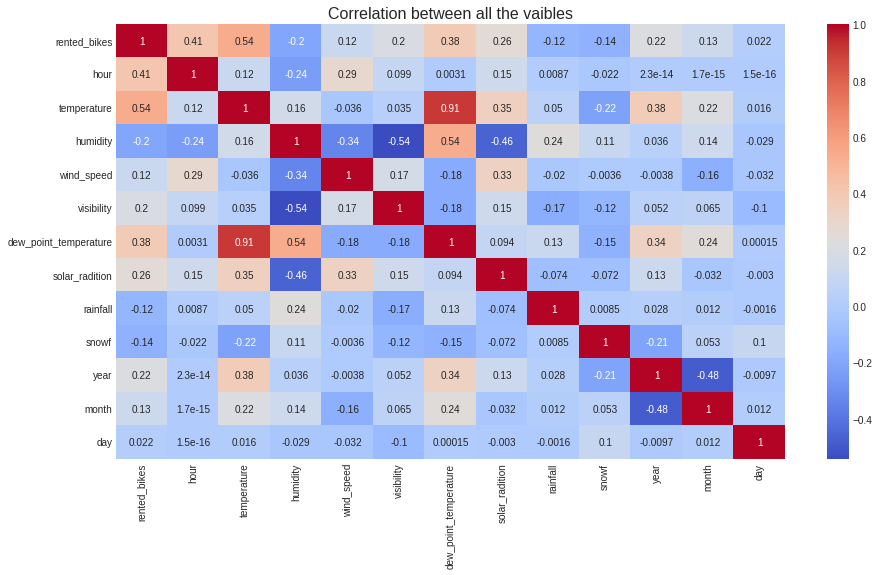

In [216]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [217]:
df.drop(columns= ['date','dew_point_temperature'], inplace=True)

In [218]:
df.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [219]:
# EDA of Every Feature

In [220]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowf            8760 non-null   float64
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   object 
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [222]:
# Converting columns into 'Categorical' and 'Numerical'

In [223]:
numerical_columns = ['rented_bikes','temperature','humidity','wind_speed','visibility','solar_radition','rainfall','snowf']
categorical_columns = ['hour','day','seasons','holiday', 'functioning_day', 'year','month','week']

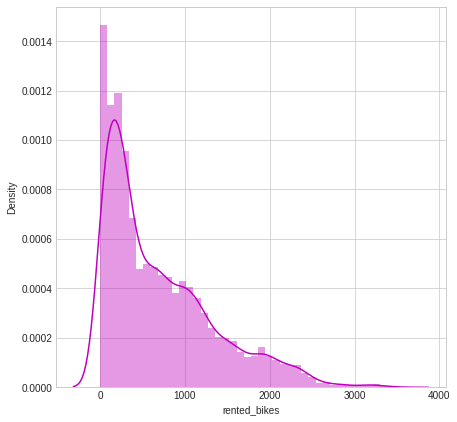

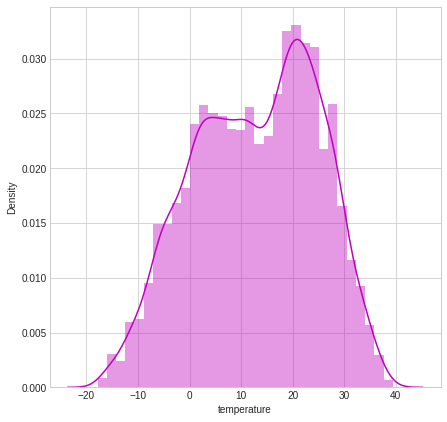

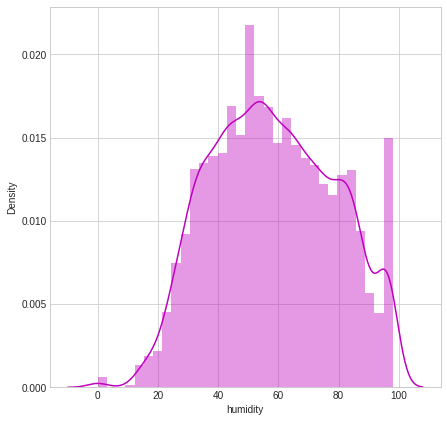

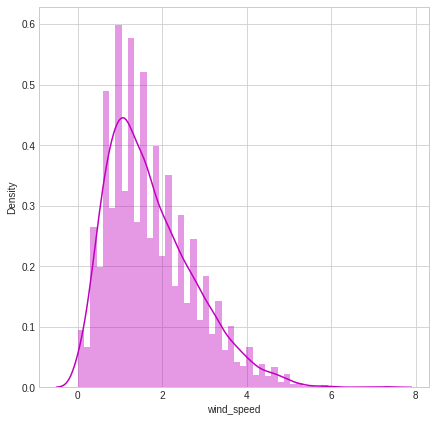

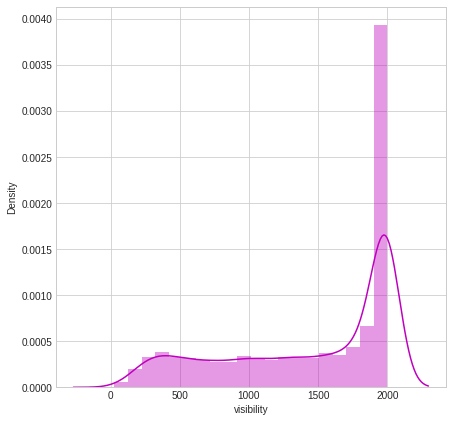

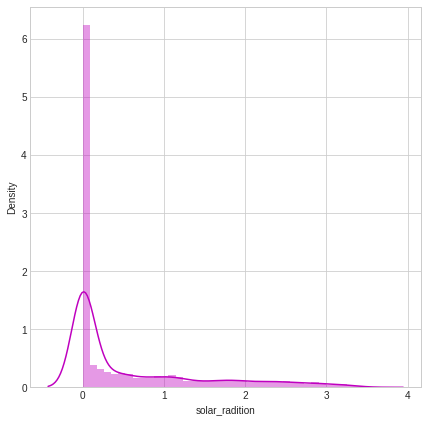

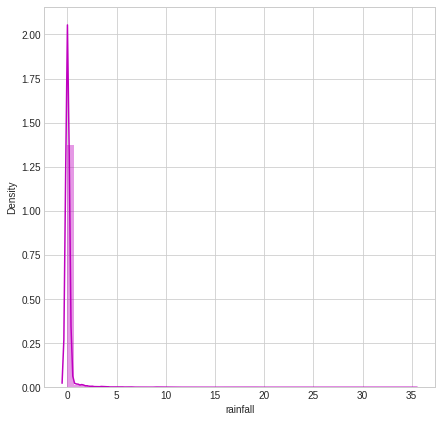

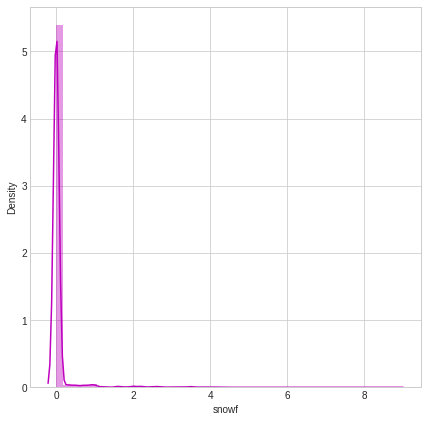

In [224]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

In [225]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [226]:
# Bar Graphs for Rented Bikes and other features

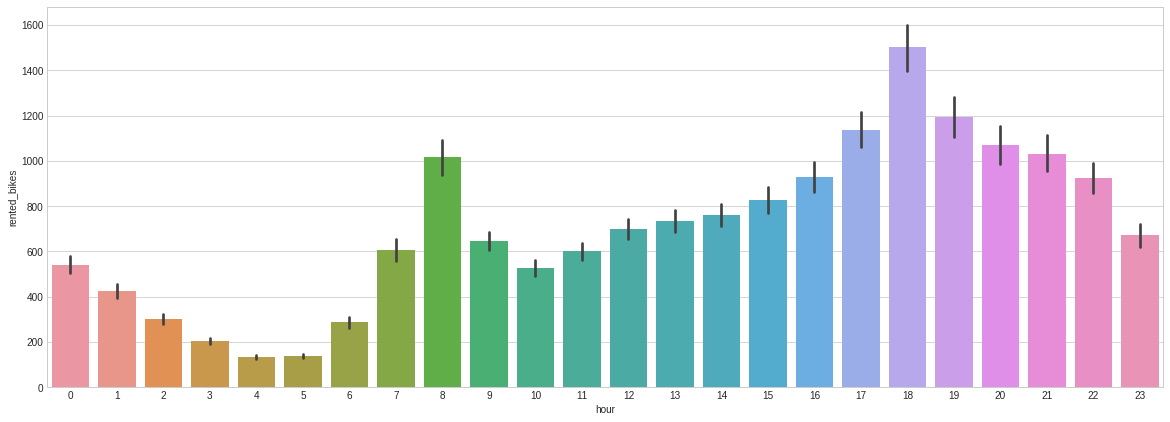

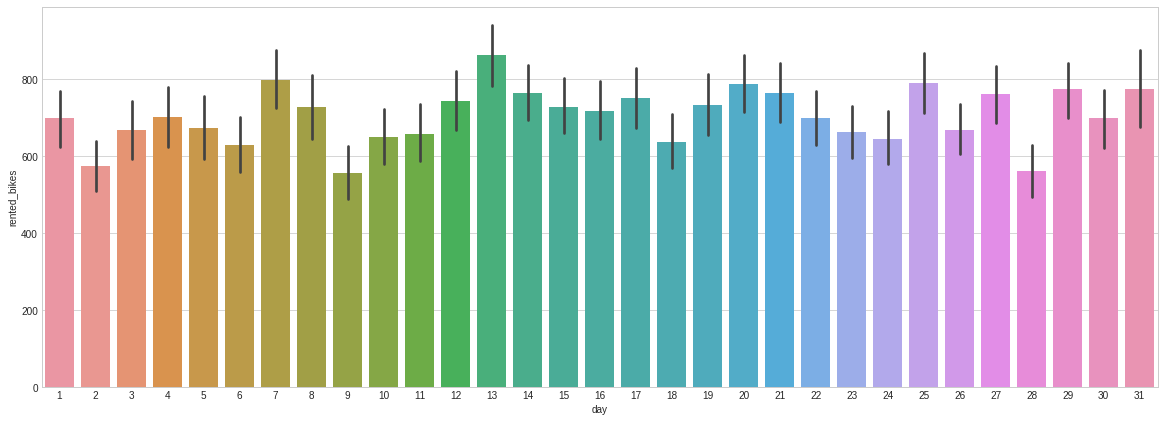

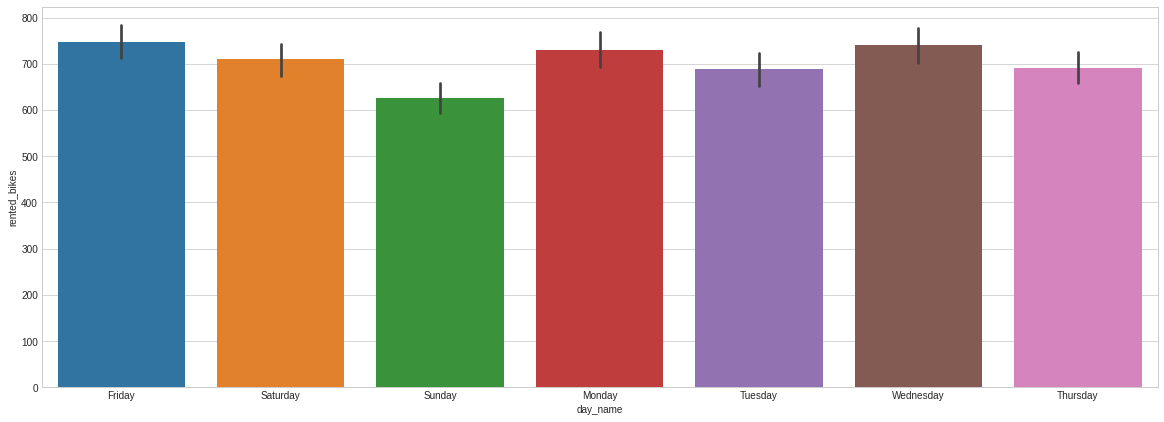

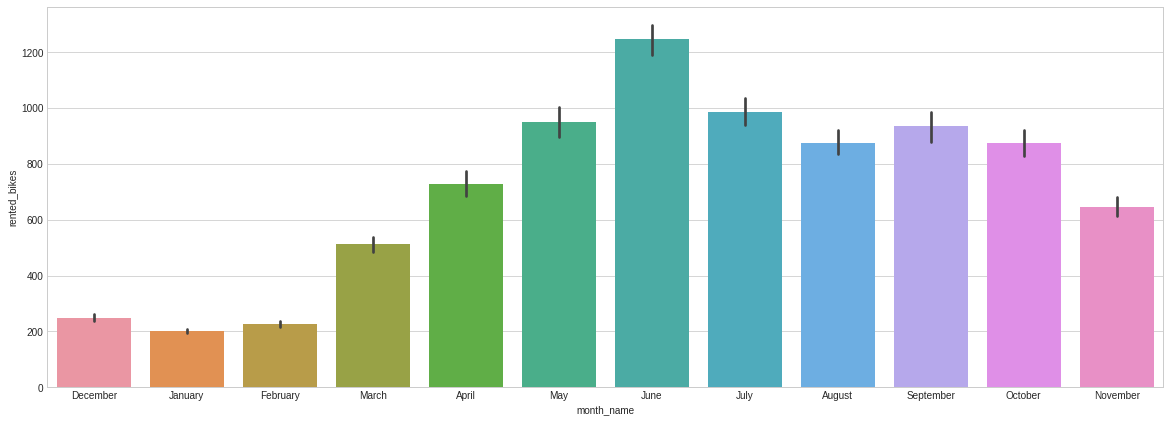

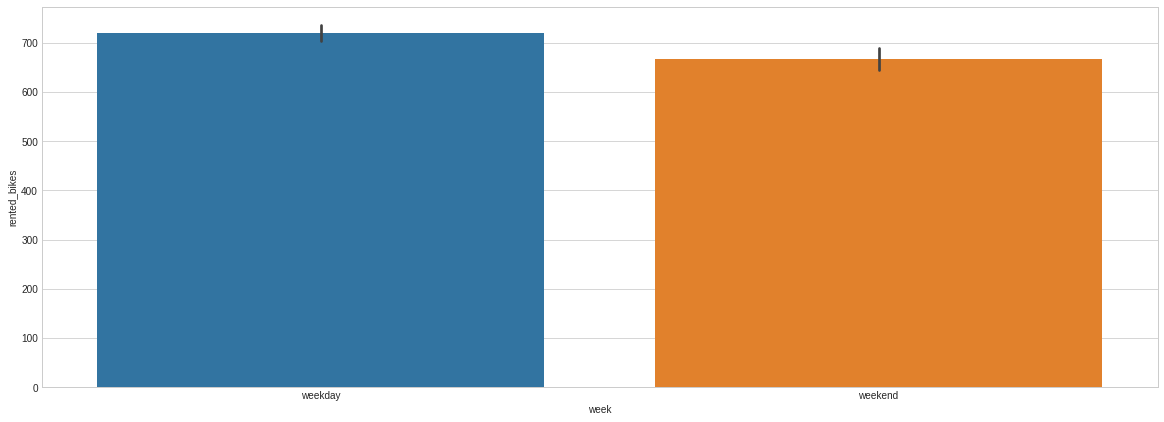

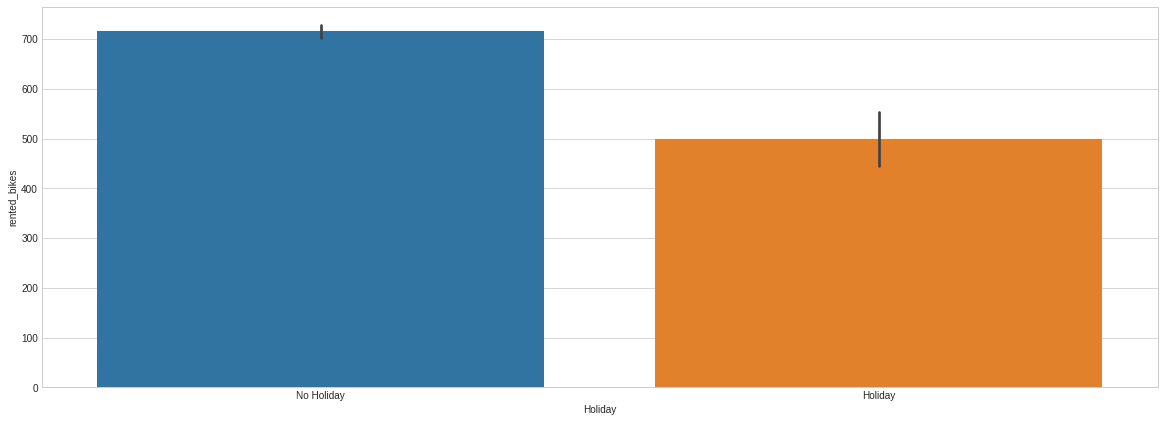

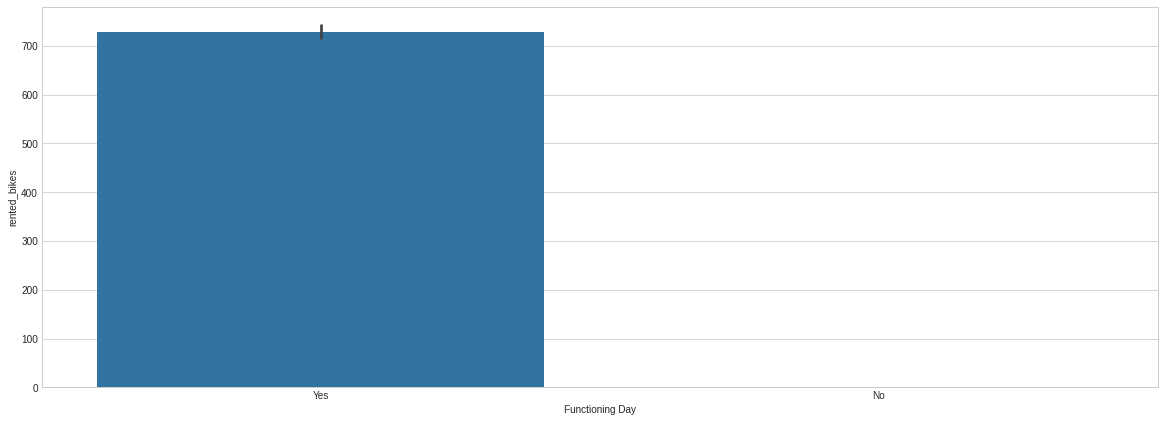

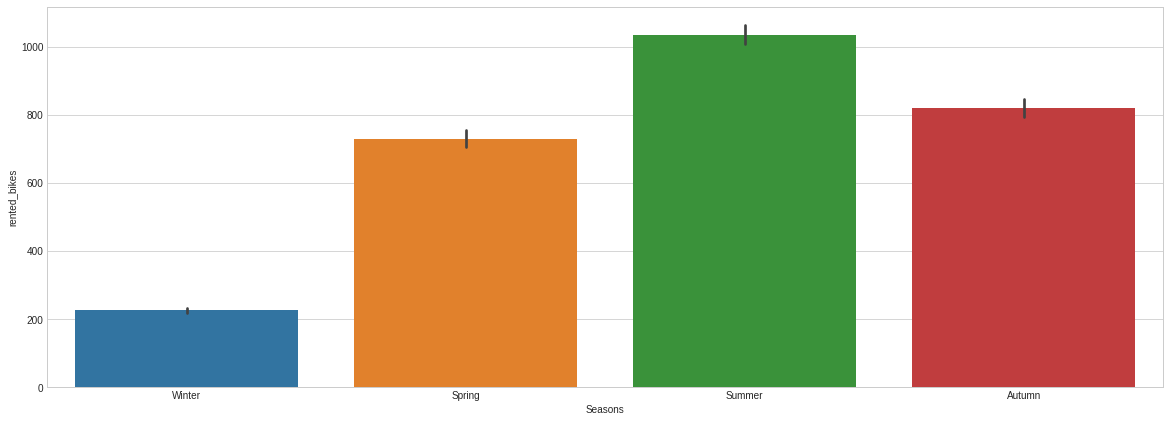

In [227]:
temp_list = ['hour','day', 'day_name', 'month_name', 'week','Holiday','Functioning Day','Seasons']
for col in temp_list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

In [228]:
# Check Outliars

In [229]:
print("Skewness: %f" % df['rented_bikes'].skew())
print("Kurtosis: %f" % df['rented_bikes'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


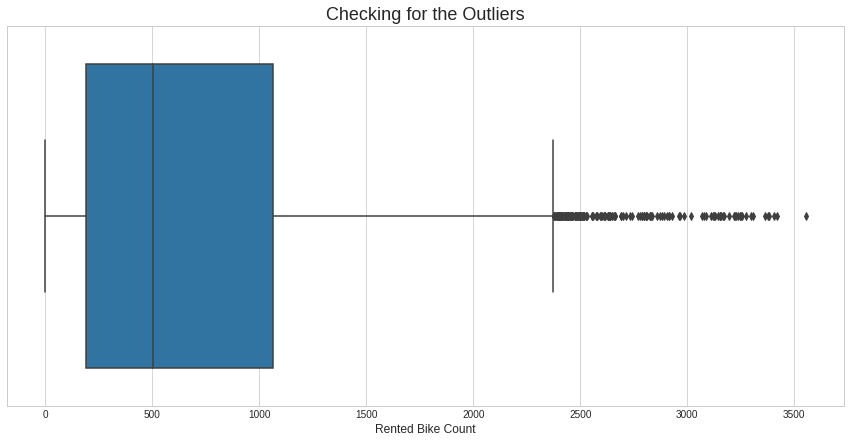

In [230]:
#box plot
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=df['rented_bikes'])
plt.title('Checking for the Outliers', size=18)
plt.xlabel('Rented Bike Count', size=12)
plt.show()


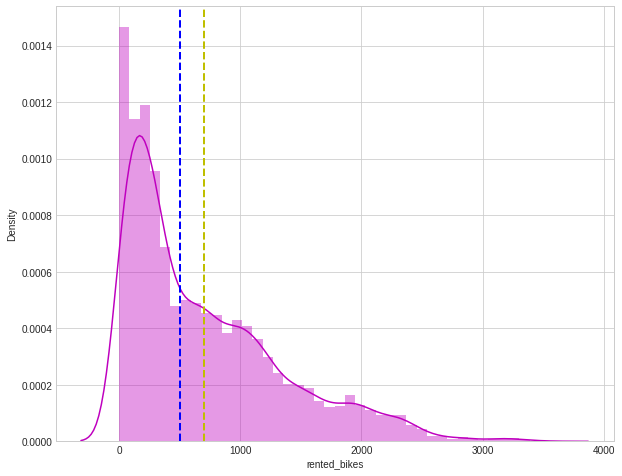

In [231]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(df['rented_bikes'],color="m")
ax.axvline((df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline((df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()


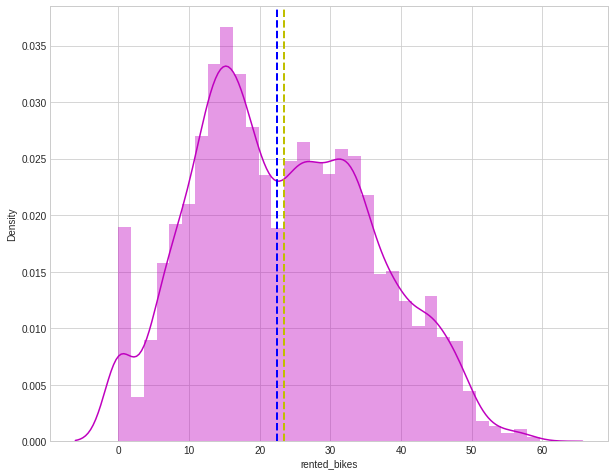

In [232]:
#Let's apply square root to reduce skewness
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
#plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['rented_bikes']),color="m")
ax.axvline(np.sqrt(df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

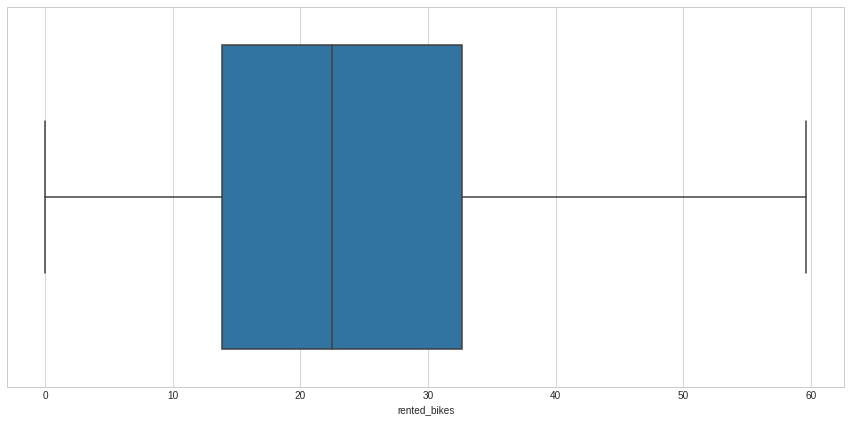

In [233]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=np.sqrt(df['rented_bikes']))

plt.show()


In [234]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [235]:
#calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bikes']]])
calc_vif(df[[i for i in numerical_columns if i not in ['rented_bikes']]])

,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radition,2.246238
5,rainfall,1.078501
6,snowf,1.118901


In [236]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [237]:
df_copy = df.copy()

In [238]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [239]:
df_copy['Functioning Day']  = df['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

In [240]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [241]:
#'visibility','solar_radition', 'rainfall' and 'snowfall' are highly skewed so we will convert them into categorical
df_copy['solar_radition'] = df_copy['solar_radition'].apply(lambda x: 0 if x==0.00 else 1)
df_copy['snowf'] = df_copy['snowf'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['rainfall'] = df_copy['rainfall'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['visibility'] = df_copy['visibility'].apply(lambda x: 0 if x<2000 else(1 if 1000<x<2000 else 2))

In [242]:
df_copy.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday


In [243]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   int64  
 7   rainfall         8760 non-null   int64  
 8   snowf            8760 non-null   int64  
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   int64  
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [244]:
df_copy = pd.get_dummies(df_copy, columns = ['hour','visibility', 'Seasons', 'Holiday', 'month','day_name','week'])
df_copy


,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,year,month_name,day,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,visibility_0,visibility_2,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,2017,December,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,2017,December,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,2017,December,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,2017,December,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,2017,December,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,2018,November,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,2018,November,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,2018,November,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,2018,November,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [245]:
df_copy = df_copy.drop(columns=['year','month_name','day'])

In [246]:
df_copy

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,visibility_0,visibility_2,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [247]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [248]:
df1 = df_copy.copy()

In [249]:
df1.head()

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,visibility_0,visibility_2,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowf            8760 non-null   float64
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   object 
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [251]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [252]:
df1.drop(['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter','day_name_Saturday','day_name_Sunday','week_weekend'], axis=1, inplace=True)

In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [254]:
y = (df_copy['rented_bikes'])

In [255]:
X = df_copy.drop(columns = ['rented_bikes'])

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(7008, 60)
(1752, 60)


In [257]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7248540733263285

In [258]:
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [259]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

#Adjuste_R2 

MSE= 115071.02059223391
RMSE= 339.221197144627
R2_Score= 0.7248540733263285


In [260]:
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

R2_Score= 0.72389960510584


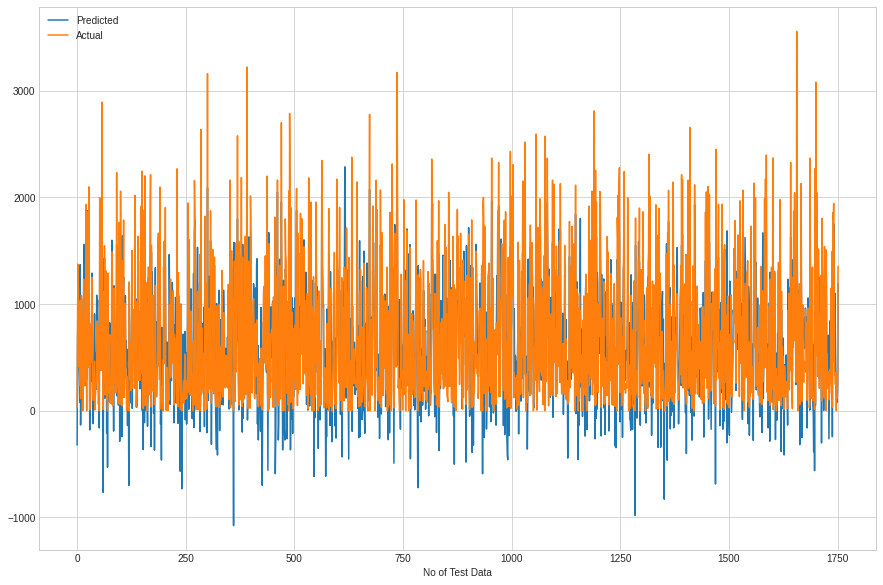

In [261]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [262]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [263]:
lasso.score(X_train, y_train)

0.7248540488414952

In [275]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lasso)

In [276]:
r2

0.723924942732736

In [269]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [270]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -117269.32604952094


In [271]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [272]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112102.68220382258
RMSE : 334.81738635235564
R2 : 0.723924942732736
Adjusted R2 :  0.7141292576729869


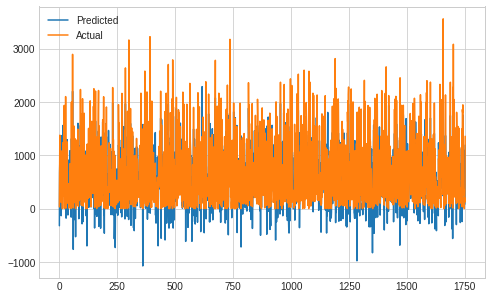

In [273]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [277]:
# Ridge Regression

In [278]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [279]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -117399.42637666925


In [280]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [281]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112092.51715519272
RMSE : 334.80220601900567
R2 : 0.7239499761782116
Adjusted R2 :  0.7141551793542569


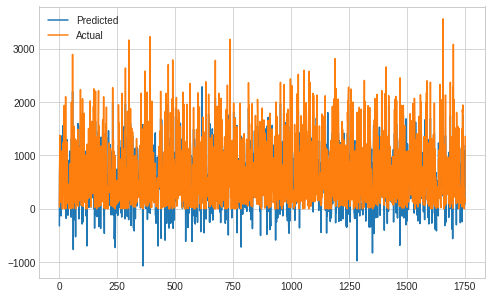

In [282]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [283]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [284]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [285]:
elasticnet.score(X_train, y_train)

0.6241716391740605

In [286]:
y_pred_en = elasticnet.predict(X_test)

In [287]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 151650.63539809597
RMSE : 389.42346539223337
R2 : 0.6265302753771337
Adjusted R2 :  0.6132788363012189


In [288]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [289]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.7}

Using  {'alpha': 0.001, 'l1_ratio': 0.7}  the negative mean squared error is:  -117260.51432877863


In [290]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [291]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112074.51115044387
RMSE : 334.7753144281159
R2 : 0.7239943195310597
Adjusted R2 :  0.714201096096325


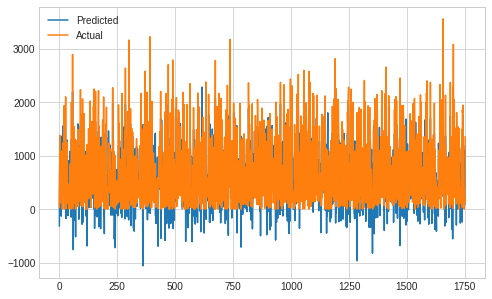

In [292]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [293]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [294]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)


print(dtr.score(X_test,y_test))

0.8370703693110878


In [295]:
r2

0.7239943195310597

In [298]:
# Random Forest

In [299]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=5)

In [300]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

In [301]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 4811.627513717465
RMSE= 69.36589589789398
R2_Score= 0.9884949337873546


In [302]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 33822.952269814494
RMSE= 183.91017445974677
R2_Score= 0.9167042812779499


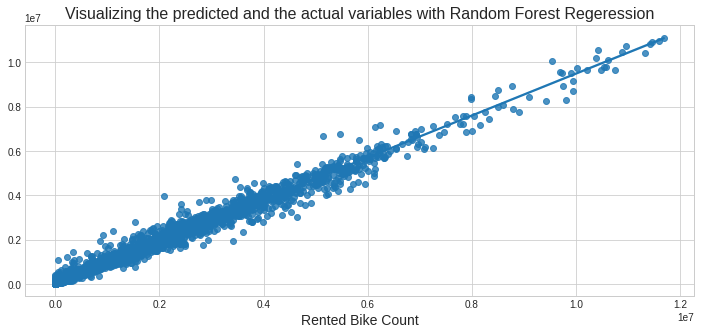

In [303]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

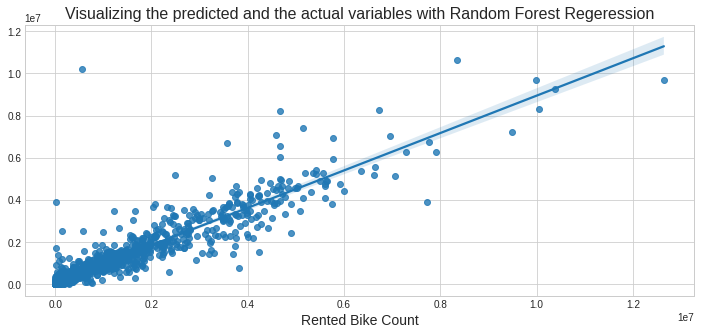

In [304]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test*y_test, pred_test*pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

In [305]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [306]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [307]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [308]:
# print(best_grid.score(X_test, y_test))
g_search.best_score_

0.9034870192660339

In [309]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

[17:05:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.964775452994582
Test score: 0.9125549195386871


0.9125549195386871

In [310]:
r2

0.9125549195386871

In [311]:
adj_r2

0.9107009602356204

In [312]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 36204.99443907895
RMSE : 190.2761005462298


In [313]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [314]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [315]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[17:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:13] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [316]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [317]:
reg_optimal_model =reg_gs.best_estimator_

In [318]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [319]:
reg_optimal_model.score(X_test,y_test)

0.9743220807414539

In [320]:
# For Test dataset:
#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [321]:
r2

0.9743220807414539

In [322]:
adj_r2

0.9737776725592939

In [323]:
# For Train dataset:
#Find R-squared value
r2 = r2_score(y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [324]:
r2

0.9758381704094514

In [325]:
adj_r2

0.9755885647318631

In [326]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 36204.99443907895
RMSE : 190.2761005462298


In [327]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [328]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

In [329]:
poly = PolynomialFeatures(degree = 2)

In [330]:
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

In [331]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
model = regressor.fit(X_train_poly, y_train)

In [332]:
# Predicting the Test set results
y_pred = regressor.predict(X_test_poly)

In [333]:
math.sqrt(mean_squared_error(y_test, y_pred))

201.80556372556885

In [334]:
r2_score(y_test, y_pred)

0.9026922639922549

In [335]:
coefficient = model.coef_
intercept = model.intercept_
print(coefficient)
print(intercept)

[ 2.26103164e+11  1.16945474e+12 -4.52211504e+11 ... -6.44221512e+08
  0.00000000e+00  9.25597626e+08]
-214922412394.83798


In [336]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 40725.485550594625
RMSE : 201.80556372556885


In [337]:
# catboost

In [338]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.4 MB/s 


In [339]:
from catboost import CatBoostRegressor
import timeit

from sklearn.datasets import make_regression

In [340]:
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )

In [341]:
model.fit(
      X_train, y_train,
      eval_set=(X_test, y_test),
      verbose=10);   

0:	learn: 634.9964696	test: 637.9062454	best: 637.9062454 (0)	total: 48.4ms	remaining: 4.79s
10:	learn: 552.0242044	test: 554.1900066	best: 554.1900066 (10)	total: 68.8ms	remaining: 557ms
20:	learn: 493.6024818	test: 496.2000155	best: 496.2000155 (20)	total: 89ms	remaining: 335ms
30:	learn: 450.9294833	test: 454.6650674	best: 454.6650674 (30)	total: 109ms	remaining: 242ms
40:	learn: 419.8543725	test: 424.6579534	best: 424.6579534 (40)	total: 129ms	remaining: 186ms
50:	learn: 395.4512133	test: 400.6387826	best: 400.6387826 (50)	total: 150ms	remaining: 144ms
60:	learn: 373.5819718	test: 379.3525924	best: 379.3525924 (60)	total: 170ms	remaining: 109ms
70:	learn: 355.1231347	test: 360.5621397	best: 360.5621397 (70)	total: 190ms	remaining: 77.6ms
80:	learn: 341.0329016	test: 346.4374282	best: 346.4374282 (80)	total: 210ms	remaining: 49.3ms
90:	learn: 327.9553051	test: 333.8502853	best: 333.8502853 (90)	total: 230ms	remaining: 22.8ms
99:	learn: 317.8496516	test: 323.4271041	best: 323.4271041

In [343]:
def train_on_cpu():  
  model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      X_train, y_train,
      eval_set=(X_test, y_test),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 634.9964696	test: 637.9062454	best: 637.9062454 (0)	total: 2.41ms	remaining: 239ms
10:	learn: 552.0242044	test: 554.1900066	best: 554.1900066 (10)	total: 29.7ms	remaining: 240ms
20:	learn: 493.6024818	test: 496.2000155	best: 496.2000155 (20)	total: 50.6ms	remaining: 191ms
30:	learn: 450.9294833	test: 454.6650674	best: 454.6650674 (30)	total: 71.1ms	remaining: 158ms
40:	learn: 419.8543725	test: 424.6579534	best: 424.6579534 (40)	total: 91.3ms	remaining: 131ms
50:	learn: 395.4512133	test: 400.6387826	best: 400.6387826 (50)	total: 111ms	remaining: 107ms
60:	learn: 373.5819718	test: 379.3525924	best: 379.3525924 (60)	total: 132ms	remaining: 84.2ms
70:	learn: 355.1231347	test: 360.5621397	best: 360.5621397 (70)	total: 159ms	remaining: 65.1ms
80:	learn: 341.0329016	test: 346.4374282	best: 346.4374282 (80)	total: 179ms	remaining: 42ms
90:	learn: 327.9553051	test: 333.8502853	best: 333.8502853 (90)	total: 202ms	remaining: 20ms
99:	learn: 317.8496516	test: 323.4271041	best: 323.427104

In [344]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [345]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

323.4271040971219

In [346]:
r2_score(y_test, y_pred)

0.7500610610983576

In [347]:
adj_r2

0.9755885647318631

In [348]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 104605.09166465054
RMSE : 323.4271040971219


In [349]:
# Validating Assumptions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [350]:
from sklearn.metrics import mean_absolute_error
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [351]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred)

MSE is 101028.40104988277
RMSE is 317.8496516434819
RMSE is 0.7567005439522471
MAE is 232.52100531891534
MAPE is inf


In [352]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 104605.09166465054
RMSE is 323.4271040971219
RMSE is 0.7500610610983576
MAE is 239.59018416975354
MAPE is inf
